### Packages loading

In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import random
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


In [19]:
num_qubits = 4
num_gibbs_qubits = 2
beta = 1
def compilation_gibbs_fitness(qc: qiskit.QuantumCircuit, num_steps = 10):
    compiler = qtm.qcompilation.QuantumCompilation(
        # u=qtm.ansatz.g2gnw(4, 2),
        u = qc,
        vdagger=qtm.state.construct_tfd_state(num_gibbs_qubits, beta = beta).inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, metrics = ['gibbs'], verbose=0)
    return np.average(compiler.loss_values)
def compilation_gibbs_threshold(fitness_value):
    if fitness_value < 0.1:
        return True
    return False


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


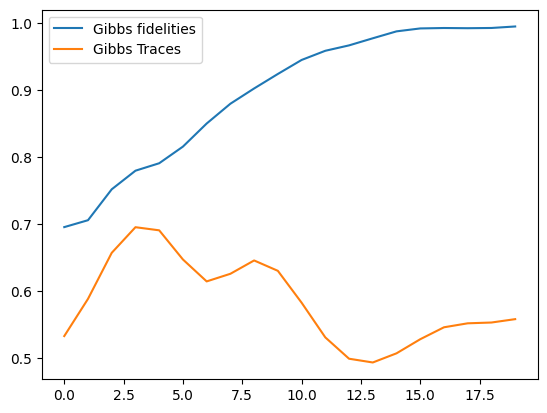

In [5]:
plt.plot(compiler.gibbs_fidelities, label='Gibbs fidelities')
plt.plot([np.real(x) for x in compiler.gibbs_traces], label='Gibbs Traces')
plt.legend()

In [27]:
params = {'depth': 10,
          'num_circuit': 16,  # Must mod 8 = 0
          'num_generation': 10,
          'num_qubits': num_qubits,
          'threshold': compilation_gibbs_threshold,
          'prob_mutate': 0.1}

env = environment.EEnvironment(
    params,
    fitness_func = compilation_gibbs_fitness,
    selection_func = selection.elitist_selection,
    crossover_func= crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool = qtm.constant.operations
)

env.evol()

Step:   0%|          | 0/10 [00:00<?, ?it/s]

Initialize population ...
Start evol progress ...
Evol at generation 0
Fitness 0.6529156890708026, Strengh 3.9279331624573763
Fitness 0.7272063543163512, Strengh 2.07119536121877
Fitness 0.7744490712005337, Strengh 1.5651560712689672
Fitness 0.8000815606899728, Strengh 1.3994813444619245


Step:  10%|█         | 1/10 [14:21<2:09:13, 861.51s/it]

Evol at generation 1
Fitness 0.6529156890708026, Strengh 3.8764108176839693
Fitness 0.7158954229009346, Strengh 2.0324539854727597
Fitness 0.7272063543163512, Strengh 1.8589222954961713
Fitness 0.7744490712005337, Strengh 1.3982564206084982


Step:  20%|██        | 2/10 [17:05<1:00:10, 451.34s/it]

Evol at generation 2
Fitness 0.6529156890708026, Strengh 3.4471601872080555
Fitness 0.7158954229009346, Strengh 1.8726791774385811
Fitness 0.722582390140434, Strengh 1.782182245234949
Fitness 0.7272063543163512, Strengh 1.725153524518903


Step:  30%|███       | 3/10 [20:26<39:17, 336.72s/it]  

Evol at generation 3
Fitness 0.6529156890708026, Strengh 2.8486133811113037
Fitness 0.7133812695792062, Strengh 1.7140346532732749
Fitness 0.7158954229009346, Strengh 1.6863434833528554
Fitness 0.7175524216970282, Strengh 1.6686828540411547


Step:  40%|████      | 4/10 [23:43<28:09, 281.60s/it]

Evol at generation 4
Fitness 0.6529156890708026, Strengh 3.0402794621563927
Fitness 0.7118921082251453, Strengh 1.6496159601564842
Fitness 0.7151798383038181, Strengh 1.6094650814729885
Fitness 0.7158954229009346, Strengh 1.6010604158668982


Step:  50%|█████     | 5/10 [26:20<19:44, 236.89s/it]

Evol at generation 5
Fitness 0.6529156890708026, Strengh 3.0395545151996544
Fitness 0.7118921082251453, Strengh 1.6191054610352518
Fitness 0.7133812695792062, Strengh 1.6007459694317836
Fitness 0.7149035040493055, Strengh 1.5825413236094388


Step:  60%|██████    | 6/10 [28:58<13:59, 209.92s/it]

Evol at generation 6
Fitness 0.6529156890708026, Strengh 3.0183883819844524
Fitness 0.7118921082251453, Strengh 1.6107212700321023
Fitness 0.7133812695792062, Strengh 1.5925624856832763
Fitness 0.7148876065683177, Strengh 1.5747434971937546


Step:  70%|███████   | 7/10 [31:38<09:40, 193.49s/it]

Evol at generation 7
Fitness 0.6529156890708026, Strengh 2.871310631641013
Fitness 0.7118921082251453, Strengh 1.6475814658964558
Fitness 0.7133812695792062, Strengh 1.6304604649042949
Fitness 0.7142974855442883, Strengh 1.6201523519409773


Step:  80%|████████  | 8/10 [34:19<06:06, 183.24s/it]

Evol at generation 8
Fitness 0.6529156890708026, Strengh 2.820015751670766
Fitness 0.7118921082251453, Strengh 1.694778367720115
Fitness 0.7133728209007629, Strengh 1.6781814003886864
Fitness 0.7141338788861296, Strengh 1.6698057373677262


Step:  90%|█████████ | 9/10 [36:54<02:54, 174.41s/it]

Evol at generation 9
Fitness 0.6529156890708026, Strengh 2.7866922753661716
Fitness 0.7118921082251453, Strengh 1.7032994251229123
Fitness 0.7133728209007629, Strengh 1.6870277141709402
Fitness 0.7141338788861296, Strengh 1.6788113948621812


Step: 100%|██████████| 10/10 [39:32<00:00, 237.21s/it]

End evol progress, best score ever: 0.7152226723070352


In [30]:
env.draw('./test')

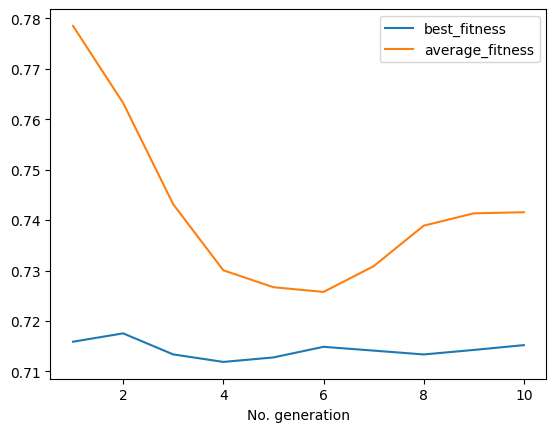

In [29]:
env.plot(['best_fitness', 'average_fitness'])

In [31]:
compiler2 = qtm.qcompilation.QuantumCompilation(
    # u=qtm.ansatz.g2gnw(4, 2),
    u = env.best_candidate.qc,
    vdagger=qtm.state.construct_tfd_state(num_gibbs_qubits, beta = beta).inverse(),
    optimizer='adam',
    loss_func='loss_fubini_study'
)
compiler2.fit(num_steps=100, metrics = ['gibbs'], verbose=0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


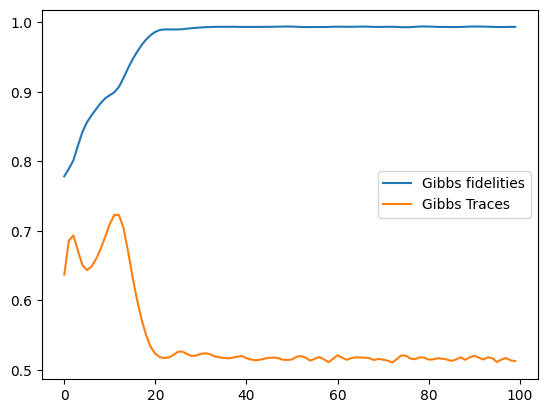

In [32]:
plt.plot(compiler2.gibbs_fidelities, label='Gibbs fidelities')
plt.plot([np.real(x) for x in compiler2.gibbs_traces], label='Gibbs Traces')
plt.legend()

In [34]:
compiler3 = qtm.qcompilation.QuantumCompilation(
    # u=qtm.ansatz.g2gnw(4, 2),
    u = env.best_candidate.qc,
    vdagger=qtm.state.construct_tfd_state(num_gibbs_qubits, beta = 0).inverse(),
    optimizer='adam',
    loss_func='loss_fubini_study'
)
compiler3.fit(num_steps=100, metrics = ['gibbs'], verbose=0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


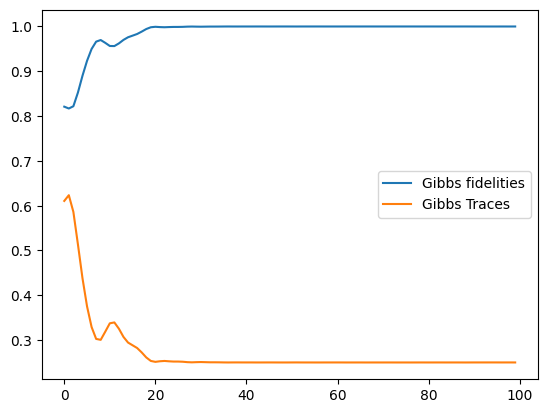

In [35]:
plt.plot(compiler3.gibbs_fidelities, label='Gibbs fidelities')
plt.plot([np.real(x) for x in compiler3.gibbs_traces], label='Gibbs Traces')
plt.legend()

In [39]:
compiler4 = qtm.qcompilation.QuantumCompilation(
    # u=qtm.ansatz.g2gnw(4, 2),
    u = env.best_candidate.qc,
    vdagger=qtm.state.construct_tfd_state(num_gibbs_qubits, beta = 5).inverse(),
    optimizer='adam',
    loss_func='loss_fubini_study'
)
compiler4.fit(num_steps=100, metrics = ['gibbs'], verbose=0)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


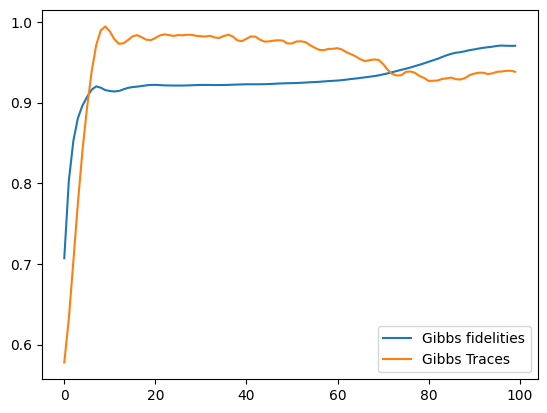

In [41]:
plt.plot(compiler4.gibbs_fidelities, label='Gibbs fidelities')
plt.plot([np.real(x) for x in compiler4.gibbs_traces], label='Gibbs Traces')
plt.legend()